<a href="https://colab.research.google.com/github/hitanshu5/ML-LAB/blob/main/MLEXP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Importing PlayTennis Dataset

In [ ]:
data = pd.read_excel('/content/tennis.xlsx')
data = data.drop(columns='Day')
data

,Outlook,Temp,Humdity,Wind,Tennis?
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,Normal,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cold,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


# Decision Tree Classifier from Scratch

We have used entropy method in this example.

1. We have used functions entropy() to
calculate the entropy of each feature.
2. gain() function to calculate the information gain for each of the features, to find the best splitting attribute.
3. Also a prediction function is used to predict if the person will play tennis or not, according to the given conditions.



In [ ]:
class Node:
  def __init__(self):
      Node.children={}
      Node.child=[]
      Node.col=None
class Tree:
    def __init__(self,df,pred):
        Tree.outcomes=df[pred].unique()
        Tree.root=self.grow(df,pred)
    def gain(self,df,feature,pred,entropy_init):
        entropysum=0
        n=len(df.index)
        for j in df[feature].unique():
            X=df[df[feature]==j]
            e=self.entropy(X[pred])
            entropysum+=e*len(X)/n
        return entropy_init-entropysum
    def entropy(self,y):
        counts=y.value_counts()
        p=len(y)
        ans=0
        for i in self.outcomes:
            if i in counts:
                ans+=-(counts[i]/p)*math.log2(counts[i]/p)
        return ans
    def true(self,y):
        e=self.entropy(y)
        if (e==1 or e==0):
            return True
        return False
    def findsplit(self,df,pred):
        if (self.true(df[pred])):
            for i in df[pred]:
                return i
        columns=df.columns[:-1]
        size=len(df)
        maxgain=0
        split_col=columns[0]
        e=self.entropy(df[pred])
        for i in columns:
            g=self.gain(df,i,pred,e)
            if (maxgain<g):
                split_col=i
                maxgain=g
        return split_col
    def grow(self,df,pred):
        n=Node()
        col=self.findsplit(df,pred)
        if (col not in df.columns):
            return col
        dict={}
        n.col=col
        for i in df[col].unique():
            X=df[df[col]==i]
            dict[i]=self.grow(X,pred)
        n.children=dict
        return n
    def predict(self,df):
        predictions=[]
        for index,row in df.iterrows():
            n=self.root
            while (n and type(n)!=str):
                cur=row[n.col]
                n=n.children[cur]
            predictions.append(n)
        return predictions

In [ ]:
t=Tree(data,"Tennis?")
d={'Outlook':['Rain'],'Temp':['Hot'],'Humidity':['Normal'],'Wind':['Weak']}
df1 = pd.DataFrame(d)
print(t.predict(df1))

['Yes']


# Decision tree using Sklearn

Importing necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

Importing the dataset

In [ ]:
data = pd.read_csv('/content/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


Taking the features to be used for prediction as feat_col

In [ ]:
data.columns
feat_col = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = data[feat_col]

Splitting the data into training and testing values

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X,data['Species'],random_state=40,test_size=0.3)

Using gini index to build the decision tree

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

Since the dataset is quite small, the accuracy of the model is very high, but it may not work as expected on unseen data points, a good example of underfitting.

In [ ]:
print("Accuracy is ",metrics.accuracy_score(y_test,y_pred))

Accuracy is  1.0


The confusion matrix shows that all the different class labels have been identified correctly by the model, since it was a small dataset, it has 100% accuracy and there are no mis-labelled class labels

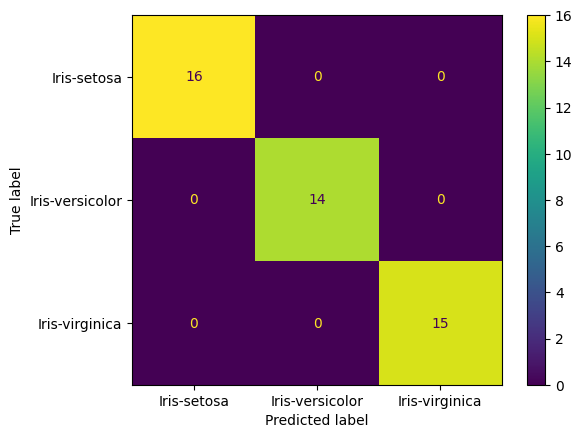

In [ ]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,y_pred)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = clf.classes_)
display.plot()
plt.show()

In [ ]:
print('Recall is ',metrics.recall_score(y_test,y_pred,average='micro'))

Recall is  1.0


In [ ]:
print('F1 score is ',metrics.f1_score(y_test,y_pred,average='micro'))

F1 score is  1.0


In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

# Plotting Decision Tree (Gini Index)

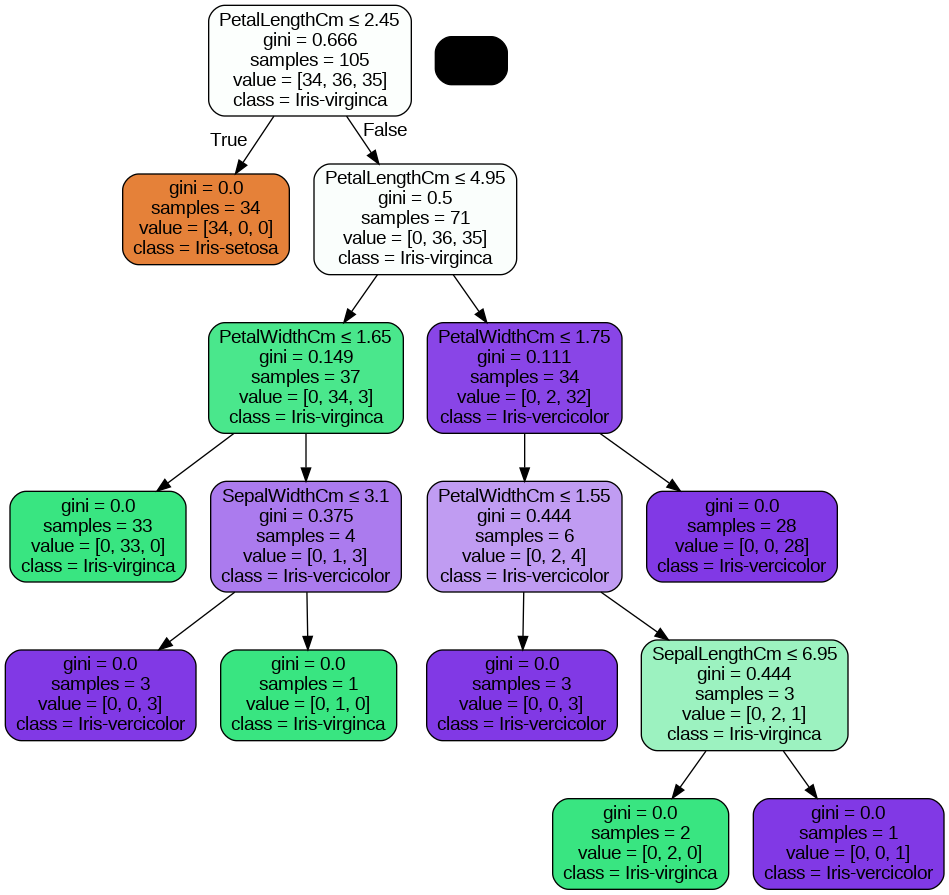

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters = True,feature_names = feat_col,class_names=['Iris-setosa','Iris-virginca','Iris-vercicolor'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

# Plotting Decision Tree (Entropy)

In [ ]:
clf1 = DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf1 = clf1.fit(X_train,y_train)

In [ ]:
y_pred1 = clf1.predict(X_test)

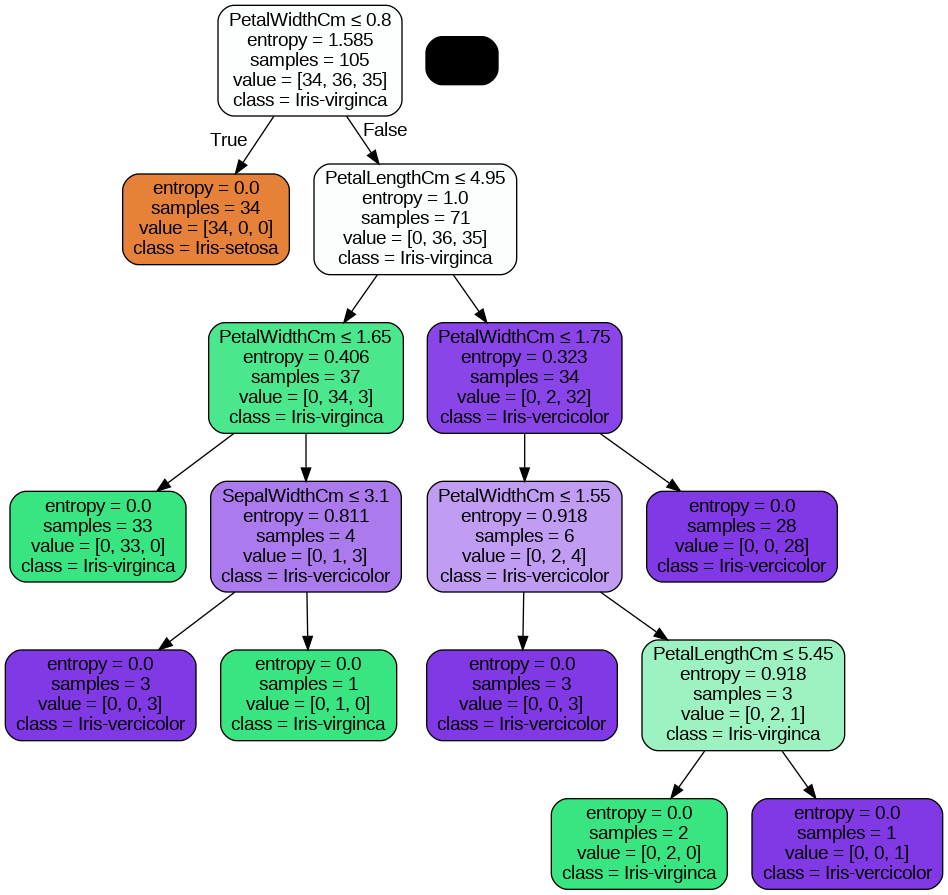

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
export_graphviz(clf1,out_file=dot_data,filled=True,rounded=True,special_characters = True,feature_names = feat_col,class_names=['Iris-setosa','Iris-virginca','Iris-vercicolor'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

# Overfitting

We take a new dataset from sklearn library which gives a dataset which can be used for classification.

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000,n_features=20,n_informative=5,n_redundant=15,random_state=40)
print(X.shape,y.shape)

(10000, 20) (10000,)


Splitting the datset into training and testing values

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X,y,random_state=40,test_size=0.3)
train_acc=[]
test_acc=[]
values = [i for i in range(1,21)]

Using for loop, we find out the accuracy if the classifier at every depth upto 20

In [ ]:
for i in values:
  clf = DecisionTreeClassifier(max_depth = i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_train)
  train = metrics.accuracy_score(y_train,y_pred)
  train_acc.append(train)
  y_pred1 = clf.predict(X_test)
  test = metrics.accuracy_score(y_test,y_pred1)
  test_acc.append(test)

With the help of the plot we can understand that at depth 6 we get the best fit for the model, but after that the model starts overfiiting

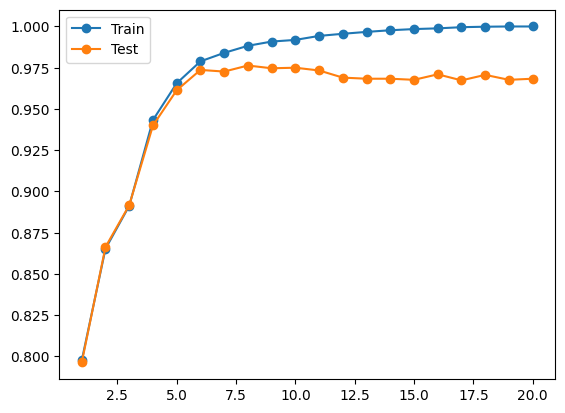

In [ ]:
plt.plot(values,train_acc,'-o',label = 'Train')
plt.plot(values,test_acc,'-o',label = 'Test')
plt.legend()
plt.show()

Importing Breast cancer datset

In [ ]:
data = pd.read_csv('/content/Breast_cancer_data.csv')
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


Taking out features that would be used for prediciton

In [ ]:
col_to_be_used = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']
df = data[col_to_be_used]

Splitting the data into training and testing values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df,data['diagnosis'],random_state=40,test_size = 0.3)

In [ ]:
train_acc=[]
test_acc=[]
values = [i for i in range(1,15)]

Using for loop, we find out the accuracy if the classifier at every depth upto 15

In [ ]:
for i in values:
  clf = DecisionTreeClassifier(max_depth = i,criterion='entropy')
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_train)
  train = metrics.accuracy_score(y_train,y_pred)
  train_acc.append(train)
  y_pred1 = clf.predict(X_test)
  test = metrics.accuracy_score(y_test,y_pred1)
  test_acc.append(test)

With the help of the plot we can understand that at depth 4 we get the best fit for the model, but after that the model starts overfiiting

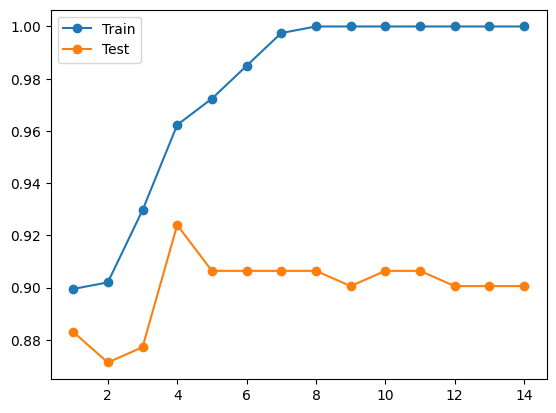

In [ ]:
plt.plot(values,train_acc,'-o',label = 'Train')
plt.plot(values,test_acc,'-o',label = 'Test')
plt.legend()
plt.show()

# Decision Tree Regressor

In [ ]:
car = pd.read_csv('/content/carprediction.csv')
car

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


Dropping any null values if present

In [ ]:
car.dropna(inplace=True)
car.drop(columns=['Engine Fuel Type','Engine HP','Engine Cylinders','Transmission Type','Driven_Wheels','Number of Doors'])
car = pd.get_dummies(car, drop_first=True)

Selecting the features that will be necessary to predict the value

In [ ]:
X = car.drop(columns=["MSRP"])
y = car["MSRP"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
reg = DecisionTreeRegressor(max_depth=25)

In [ ]:
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=25)

In [ ]:
y_pred = reg.predict(X_test)

The value of mean squared error is too high, so it not feasible to use this for dataset

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error is {mse}')

Mean Squared Error is 803417777.4968367
